## Assignments

Read about (Susanna Epp pp. 704):
1. Kruskal's Algorithm
2. Prim's Algorithm
3. Djitraka's Shortest Path Algorithm

Given the following graph, implement the algorithm in Python.

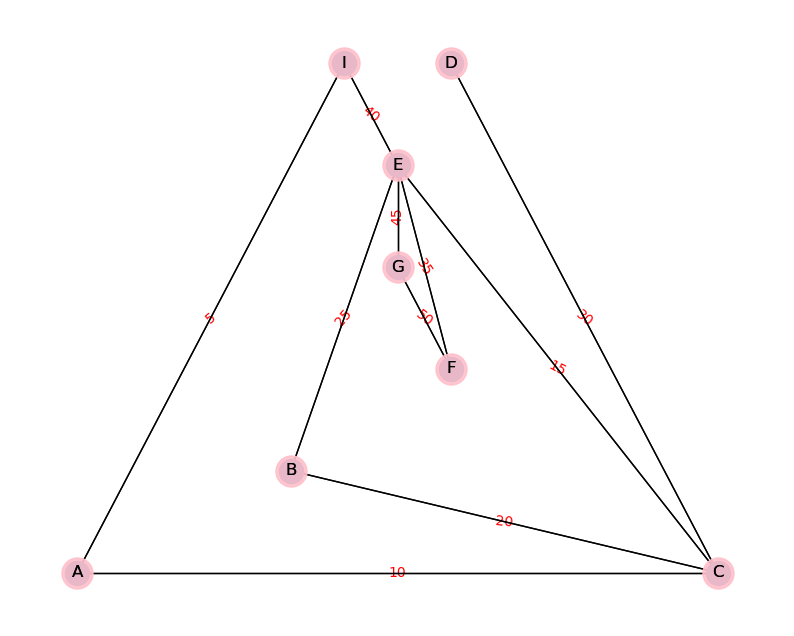

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
seed = 55
# Use seed for reproducibility
G = nx.Graph()
plt.figure(figsize=(10, 8))
# Add nodes
G.add_nodes_from(["A","B","C","D","E","F","G"])
# Add self-loops to the remaining nodes
edgelist = [("A","C"),("A","I"),("C","B"),("C","E"),("C","D"),("B","E"),("I","E"),("E","F"),("F","G"),("G","E")]
G.add_edges_from(edgelist)
pos = nx.planar_layout(G)  # Seed for reproducible layout
nx.draw_networkx_edge_labels(
    G, pos,
    edge_labels={("A","C"):10,("A","I"):5,("C","B"):20,("C","E"):15,("C","D"):30,("B","E"):25,("I","E"):40,("E","F"):35,("F","G"):50,("G","E"):45},
    font_color='red'
)
nx.draw(G, pos=pos,with_labels=True)
nx.draw(
    G, pos, edge_color='black', width=1, linewidths=1,
    node_size=500, node_color='pink', alpha=0.9,
    with_labels=True)

plt.show()

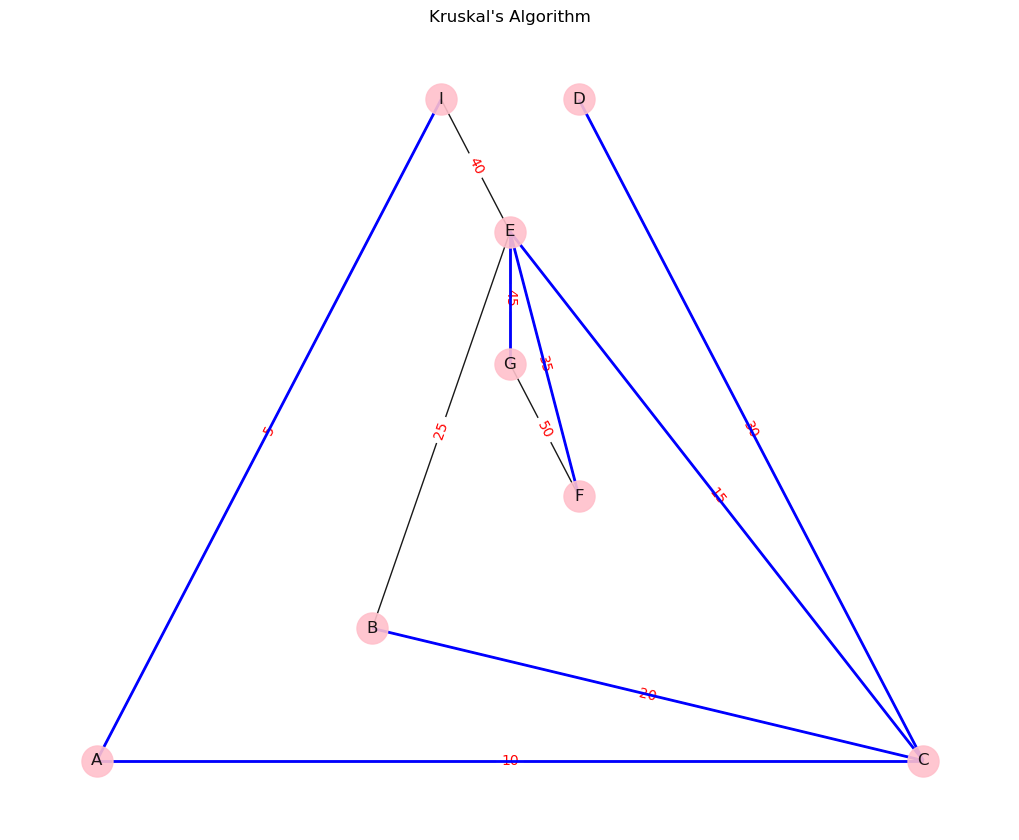

In [27]:
import matplotlib.pyplot as plt
import networkx as nx

# Union-Find (Disjoint Set) implementation
class UnionFind:
    def __init__(self, nodes):
        self.parent = {node: node for node in nodes}
        self.rank = {node: 0 for node in nodes}

    def find(self, node):
        if self.parent[node] != node:
            self.parent[node] = self.find(self.parent[node])  # Path compression
        return self.parent[node]

    def union(self, node1, node2):
        root1 = self.find(node1)
        root2 = self.find(node2)

        if root1 != root2:
            if self.rank[root1] > self.rank[root2]:
                self.parent[root2] = root1
            elif self.rank[root1] < self.rank[root2]:
                self.parent[root1] = root2
            else:
                self.parent[root2] = root1
                self.rank[root1] += 1

# Initialize the graph
G = nx.Graph()

# Add nodes
G.add_nodes_from(["A", "B", "C", "D", "E", "F", "G", "I"])

# Add edges with weights
edgelist = [
    ("A", "C", 10),
    ("A", "I", 5),
    ("C", "B", 20),
    ("C", "E", 15),
    ("C", "D", 30),
    ("B", "E", 25),
    ("I", "E", 40),
    ("E", "F", 35),
    ("F", "G", 50),
    ("G", "E", 45)
]
G.add_weighted_edges_from(edgelist)

# Kruskal's algorithm implementation
def kruskal(G):
    mst = nx.Graph()
    edges = sorted(G.edges(data=True), key=lambda x: x[2]['weight'])
    uf = UnionFind(G.nodes)

    for u, v, data in edges:
        if uf.find(u) != uf.find(v):
            mst.add_edge(u, v, weight=data['weight'])
            uf.union(u, v)

    return mst

# Create MST using Kruskal's algorithm
mst = kruskal(G)

# Draw the graph with MST edges highlighted
plt.figure(figsize=(10, 8))
pos = nx.planar_layout(G)

# Draw all edges
nx.draw(G, pos, with_labels=True, node_color='pink', edge_color='black', node_size=500, alpha=0.9)
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): d['weight'] for u, v, d in G.edges(data=True)}, font_color='red')

# Highlight MST edges
mst_edges = list(mst.edges(data=True))
nx.draw_networkx_edges(G, pos, edgelist=mst_edges, edge_color='blue', width=2)

plt.title("Kruskal's Algorithm")
plt.show()


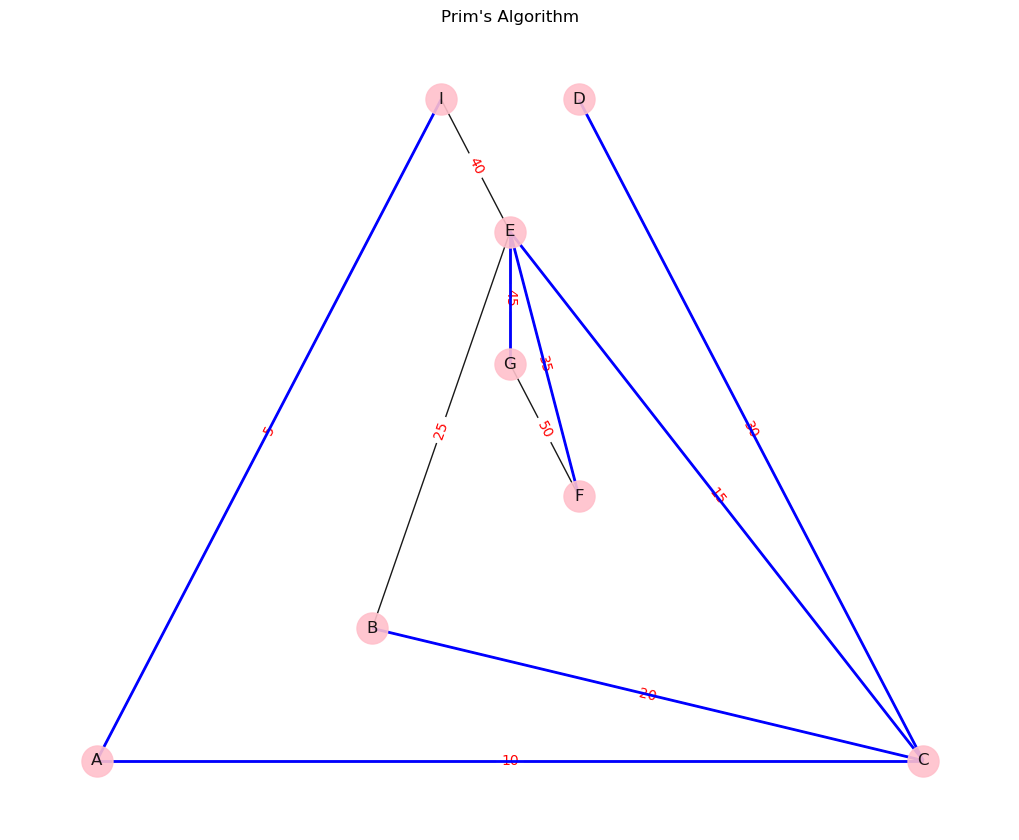

In [35]:
import matplotlib.pyplot as plt
import networkx as nx
import heapq

# Initialize the graph
G = nx.Graph()

# Add nodes
G.add_nodes_from(["A", "B", "C", "D", "E", "F", "G", "I"])

# Add edges with weights
edgelist = [
    ("A", "C", 10),
    ("A", "I", 5),
    ("C", "B", 20),
    ("C", "E", 15),
    ("C", "D", 30),
    ("B", "E", 25),
    ("I", "E", 40),
    ("E", "F", 35),
    ("F", "G", 50),
    ("G", "E", 45)
]
G.add_weighted_edges_from(edgelist)

# Prim's algorithm implementation
def prim(G, start_node):
    mst = nx.Graph()
    visited = set([start_node])
    edges = [(data['weight'], start_node, to) for to, data in G[start_node].items()]
    heapq.heapify(edges)
    
    while edges:
        weight, frm, to = heapq.heappop(edges)
        if to not in visited:
            visited.add(to)
            mst.add_edge(frm, to, weight=weight)
            
            for next_to, data in G[to].items():
                if next_to not in visited:
                    heapq.heappush(edges, (data['weight'], to, next_to))
    
    return mst

# Create MST using Prim's algorithm starting from node 'A'
mst = prim(G, 'A')

# Draw the graph with MST edges highlighted
plt.figure(figsize=(10, 8))
pos = nx.planar_layout(G)

# Draw all edges
nx.draw(G, pos, with_labels=True, node_color='pink', edge_color='black', node_size=500, alpha=0.9)
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): d['weight'] for u, v, d in G.edges(data=True)}, font_color='red')

# Highlight MST edges
mst_edges = list(mst.edges(data=True))
nx.draw_networkx_edges(G, pos, edgelist=mst_edges, edge_color='blue', width=2)

plt.title("Prim's Algorithm")
plt.show()


Shortest paths from node 'A':
A: 0
B: 30
C: 10
D: 40
E: 25
F: 60
G: 70
I: 5


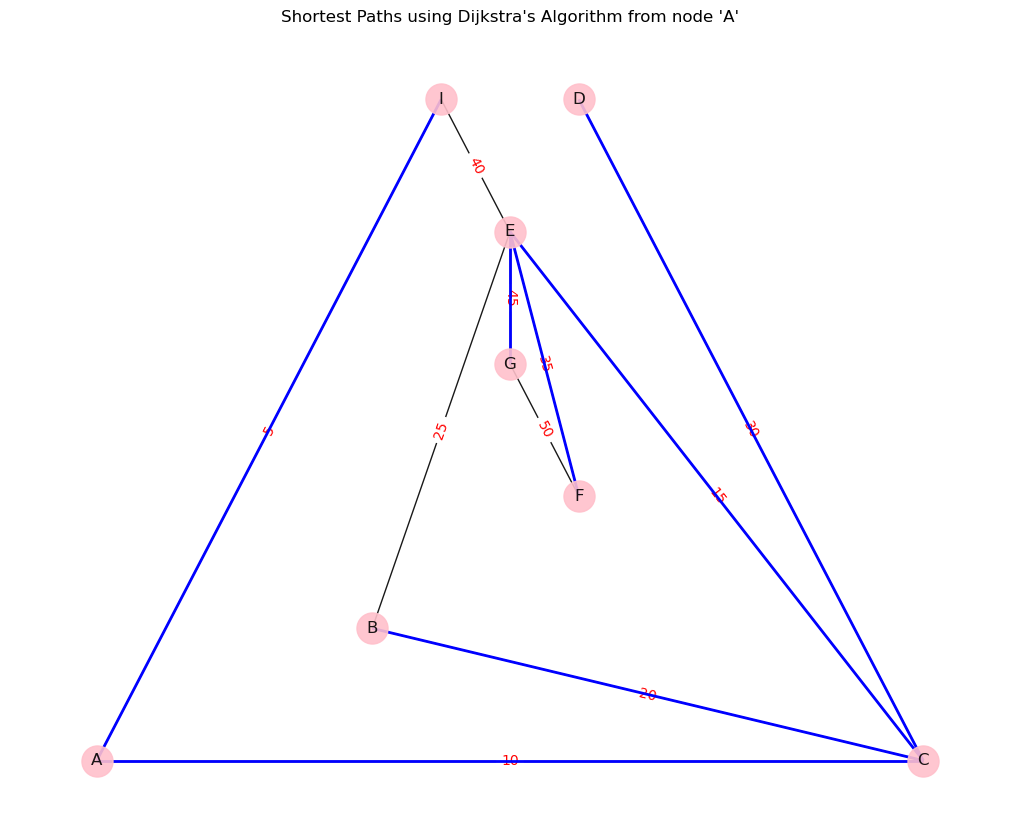

In [37]:
import matplotlib.pyplot as plt
import networkx as nx
import heapq

# Initialize the graph
G = nx.Graph()

# Add nodes
G.add_nodes_from(["A", "B", "C", "D", "E", "F", "G", "I"])

# Add edges with weights
edgelist = [
    ("A", "C", 10),
    ("A", "I", 5),
    ("C", "B", 20),
    ("C", "E", 15),
    ("C", "D", 30),
    ("B", "E", 25),
    ("I", "E", 40),
    ("E", "F", 35),
    ("F", "G", 50),
    ("G", "E", 45)
]
G.add_weighted_edges_from(edgelist)

# Dijkstra's algorithm implementation
def dijkstra(G, start_node):
    shortest_paths = {node: float('inf') for node in G.nodes}
    shortest_paths[start_node] = 0
    visited = set()
    pq = [(0, start_node)]
    
    while pq:
        curr_dist, curr_node = heapq.heappop(pq)
        if curr_node in visited:
            continue
        
        visited.add(curr_node)
        for neighbor, data in G[curr_node].items():
            if neighbor not in visited:
                new_dist = curr_dist + data['weight']
                if new_dist < shortest_paths[neighbor]:
                    shortest_paths[neighbor] = new_dist
                    heapq.heappush(pq, (new_dist, neighbor))
    
    return shortest_paths

# Compute shortest paths from node 'A'
shortest_paths = dijkstra(G, 'A')

# Print shortest paths
print("Shortest paths from node 'A':")
for node, dist in shortest_paths.items():
    print(f"{node}: {dist}")

# Draw the graph with shortest paths
plt.figure(figsize=(10, 8))
pos = nx.planar_layout(G)

# Draw all edges
nx.draw(G, pos, with_labels=True, node_color='pink', edge_color='black', node_size=500, alpha=0.9)
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): d['weight'] for u, v, d in G.edges(data=True)}, font_color='red')

# Highlight shortest paths
shortest_path_edges = [(node, neighbor) for node in shortest_paths for neighbor, data in G[node].items() if shortest_paths[neighbor] == shortest_paths[node] + data['weight']]
nx.draw_networkx_edges(G, pos, edgelist=shortest_path_edges, edge_color='blue', width=2)

plt.title("Shortest Paths using Dijkstra's Algorithm from node 'A'")
plt.show()
